In [13]:
import numpy as np
import pandas as pd

rainfall = pd.read_csv('Downloads/data/Seattle2014.csv')['PRCP'].values
inches = rainfall / 254.0  # 1/10mm -> inches
inches.shape

(365,)

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
seaborn.set()

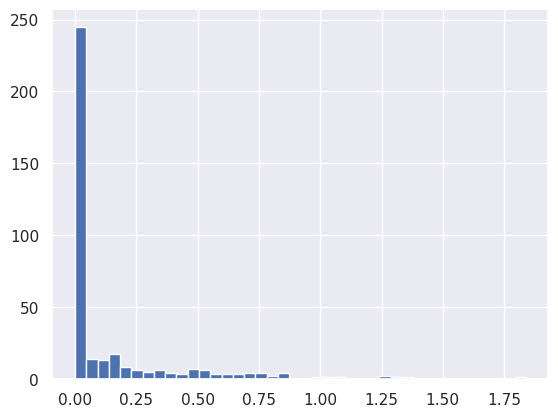

In [15]:
plt.hist(inches, 40);

In [16]:
rng = np.random.RandomState(0)
x = rng.randint(10, size=(3, 4))
x


array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [17]:
np.count_nonzero(x < 6)

8

In [18]:
(x<6).sum()

8

In [21]:
np.sum(x < 6, axis = 1)

array([4, 2, 2])

In [22]:
print("Number days without rain:      ", np.sum(inches == 0))
print("Number days with rain:         ", np.sum(inches != 0))
print("Days with more than 0.5 inches:", np.sum(inches > 0.5))
print("Rainy days with < 0.2 inches  :", np.sum((inches > 0) & (inches < 0.2)))


Number days without rain:       215
Number days with rain:          150
Days with more than 0.5 inches: 37
Rainy days with < 0.2 inches  : 75


In [37]:
rainy = (inches > 0)


# construct a mask of all summer days (June 21st is the 172nd day)
days = np.arange(365)
summer = (days > 172) & (days < 262)

print("Median precip on rainy days in 2014 (inches): ", np.median(inches[rainy]))
print("Median precip on summer days in 2014 (inches): ", np.median(inches[summer]))
print("Maximum precip on summer days in 2014 (inches): ", np.max(inches[summer]))
print("Median precip on non-summer rainy days (inches): ", np.max(inches[rainy]))


Median precip on rainy days in 2014 (inches):  0.19488188976377951
Median precip on summer days in 2014 (inches):  0.0
Maximum precip on summer days in 2014 (inches):  0.8503937007874016
Median precip on non-summer rainy days (inches):  1.8385826771653544


In [40]:
import numpy as np
rand = np.random.RandomState(42)

x = rand.randint(100, size=10)
print(x)

index = [3, 7, 4]
x[index]

[51 92 14 71 60 20 82 86 74 74]


array([71, 86, 60])

In [64]:
X = np.arange(12).reshape((3, 4))
print(X)
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])


mask = np.array([1, 0, 1, 0], dtype=bool)
X[row[:, np.newaxis], mask]
# X[row[:, np.newaxis]]

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

In [68]:
mean = [0, 0]
cov = [[1, 2], [2, 5]]
X = rand.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

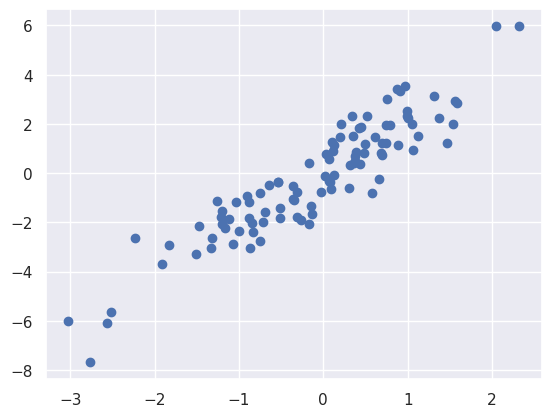

In [66]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # for plot styling

plt.scatter(X[:, 0], X[:, 1]);

In [69]:
indices = np.random.choice(X.shape[0], 20, replace=False)
indices


array([64, 82, 34, 46,  5, 92, 44, 75, 37, 79, 32, 47, 91, 62,  6, 41, 69,
        0, 26, 19])

In [70]:
selection = X[indices]  # fancy indexing here
selection.shape

(20, 2)

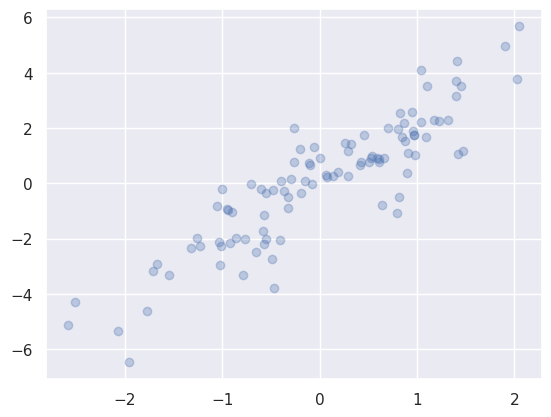

In [77]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.scatter(selection[:,0], selection[:, 1], facecolor='none', s=200)

In [78]:
x = np.zeros(10)
i = [2, 3, 3, 4, 4, 4]
x[i] += 1
x

array([0., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

array([ 0.,  0.,  0.,  0.,  0.,  1.,  3.,  7.,  9., 23., 22., 17., 10.,
        7.,  1.,  0.,  0.,  0.,  0.,  0.])

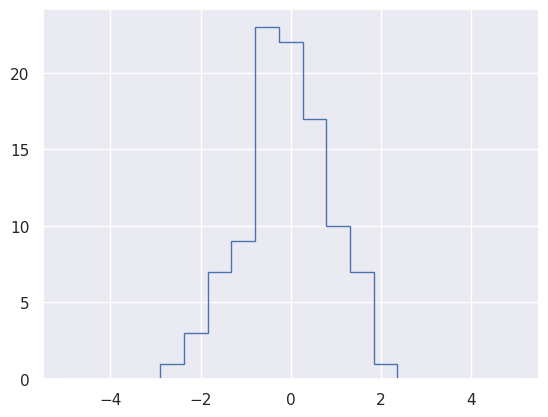

In [123]:
np.random.seed(42)
x = np.random.randn(100)

# compute a histogram by hand
bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)


i = np.searchsorted(bins, x)
np.add.at(counts, i, 1)

plt.hist(x, bins, histtype='step');

counts

In [120]:
counts = np.zeros_like(bins)
np.sum(i == 6)


3

In [115]:
x

array([ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986, -0.23415337,
       -0.23413696,  1.57921282,  0.76743473, -0.46947439,  0.54256004,
       -0.46341769, -0.46572975,  0.24196227, -1.91328024, -1.72491783,
       -0.56228753, -1.01283112,  0.31424733, -0.90802408, -1.4123037 ,
        1.46564877, -0.2257763 ,  0.0675282 , -1.42474819, -0.54438272,
        0.11092259, -1.15099358,  0.37569802, -0.60063869, -0.29169375,
       -0.60170661,  1.85227818, -0.01349722, -1.05771093,  0.82254491,
       -1.22084365,  0.2088636 , -1.95967012, -1.32818605,  0.19686124,
        0.73846658,  0.17136828, -0.11564828, -0.3011037 , -1.47852199,
       -0.71984421, -0.46063877,  1.05712223,  0.34361829, -1.76304016,
        0.32408397, -0.38508228, -0.676922  ,  0.61167629,  1.03099952,
        0.93128012, -0.83921752, -0.30921238,  0.33126343,  0.97554513,
       -0.47917424, -0.18565898, -1.10633497, -1.19620662,  0.81252582,
        1.35624003, -0.07201012,  1.0035329 ,  0.36163603, -0.64